# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.sparse as sps
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Carregando os dados

In [2]:
start = time.time()
vetor_train_target = sps.load_npz('data/sparse_matrix_train_target_small.npz').tocsr()
matriz_train       = sps.load_npz('data/sparse_matrix_train_small.npz').tocsr()
matriz_test        = sps.load_npz('data/sparse_matrix_test_small.npz' ).tocsr()
end = time.time()


print('Tempo de carregamento das Matrizes: '+str("%.2f" % (end - start))+'s\n')


Tempo de carregamento das Matrizes: 0.04s



# Avaliando regressor linear

Tempo de processamento do regressor linear: 4.56s



RMSE MEAN:  0.2596
RMSE STD:   0.0115




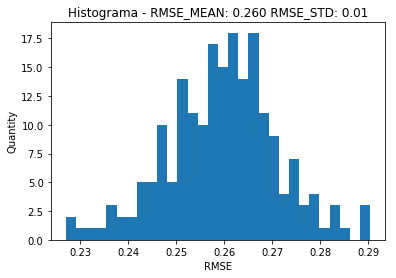

In [3]:
from sklearn.linear_model import LinearRegression
start = time.time()

def regressao_linear():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    regr = LinearRegression(n_jobs = -1)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(200):
    rmse = regressao_linear()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor Ridge

Tempo de processamento do regressor ridge: 3.31s



RMSE MEAN:  0.2482
RMSE STD:   0.0112




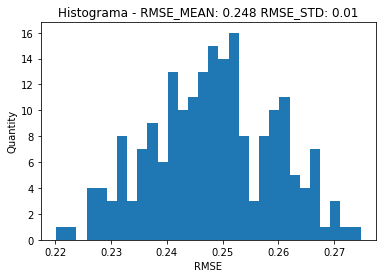

In [4]:
from sklearn.linear_model import Ridge
start = time.time()

def regressao_ridge():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    regr = Ridge(alpha = 29.0)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(200):
    rmse = regressao_ridge()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor ridge: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

start = time.time()

def regressao_gradient_boosting():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    regr = GradientBoostingRegressor(learning_rate = 0.01)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 200 vezes através de amostras aleatórias
for i in range(80):
    rmse = regressao_gradient_boosting()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do GradientBoostingRegressor : '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor SVM

Tempo de processamento do regressor SVM: 20.35s



RMSE MEAN:  0.2580
RMSE STD:   0.0095




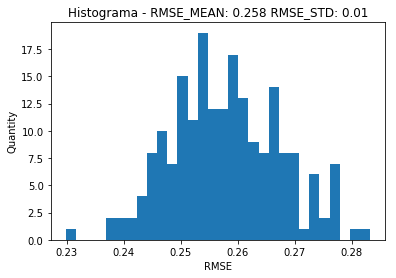

In [6]:
from sklearn.svm import SVR

start = time.time()

def regressao_svm():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor SVM
    regr = SVR('linear')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(200):
    rmse = regressao_svm()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor SVM: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regresor KNN

Tempo de processamento do regressor KNN: 14.96s



RMSE MEAN:  0.2533
RMSE STD:   0.0121




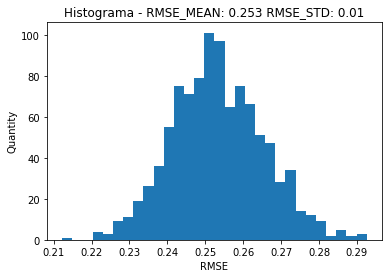

In [7]:
from sklearn.neighbors import KNeighborsRegressor

start = time.time()

def regressao_knn():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor KNN
    regr = KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                               metric_params=None, n_jobs=1, n_neighbors=30, p=2,
                               weights='distance')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(1000):
    rmse = regressao_knn()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor KNN: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor LGBM

In [24]:
from lightgbm import LGBMRegressor

start = time.time()

def regressao_lgbm():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor LGBM
    regr = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                         learning_rate=0.05, max_depth=-1, min_child_samples=20,
                         min_child_weight=0.001, min_split_gain=0.0, n_estimators=15,
                         n_jobs=-1, num_leaves=5, objective='regression', random_state=None,
                         reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                         subsample_for_bin=200000, subsample_freq=1) 
    params: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5}
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel(),  eval_metric='metric') 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(500):
    rmse = regressao_lgbm()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor LGBM: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

ModuleNotFoundError: No module named 'lightgbm'

# Utilizando regressor ridge em dados de teste

In [15]:

X_train = matriz_train
y_train = vetor_train_target
X_test  = matriz_test

# Criando Regressor Ridge
regr = Ridge(alpha = 29.0)

# Treino
regr.fit(X_train, y_train.toarray().ravel()) 

# Predição      
y_pred = regr.predict(X_test)

# Melhorando resultado
def fronteira(y):
    if y >1:
        return 1.0
    elif y <0:
        return 0.0
    else:
        return y
    
y_pred = np.array(list(map(fronteira, y_pred)))


# Utilizando Bagging

In [8]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.utils import check_random_state
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from lightgbm import LGBMRegressor

#randomState = check_random_state(0)
X = matriz_train
y = vetor_train_target

def regressao_bagging(base_estimator, params):
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
    
    kf = KFold(n_splits=4);
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test];
        y_train, y_test = y[train], y[test];

    # Criando Regressor Linear
    #regr = BaggingRegressor(base_estimator=base_estimator,
    #                     **params, random_state=randomState)
    regr = BaggingRegressor(base_estimator=base_estimator,
                         **params)
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

# Parametros a serem variados no bagging
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                      "max_features": [0.5, 1.0],
                      "bootstrap": [True, False],
                      "bootstrap_features": [True, False]})

# Testando cada estimador com cada configuração de parametros
'''

'''
for base_estimator in [
    None,
    Ridge(alpha = 29.0),
    GradientBoostingRegressor(learning_rate = 0.01),
    DummyRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor()]:#,
    #LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=15)]:
    for params in grid:
        start = time.time()

        rmse_list =[]

        # Testando 20 vezes através de amostras aleatórias
        for i in range(20):
            rmse = regressao_bagging(base_estimator,params)
            rmse_list.append(rmse)
        end = time.time()

        print('Tempo de processamento do regressor Bagging - Estimador: ' + str(base_estimator) + ' params: ' + str(params) + ': '+str("%.2f" % (end - start))+'s\n')
        print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
        print("RMSE STD:  ","%.4f" % np.std(rmse_list))
        print("\n")

Tempo de processamento do regressor Bagging - Estimador: None params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5}: 7.16s

RMSE MEAN:  0.2747
RMSE STD:   0.0166


Tempo de processamento do regressor Bagging - Estimador: None params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0}: 13.37s

RMSE MEAN:  0.2687
RMSE STD:   0.0177


Tempo de processamento do regressor Bagging - Estimador: None params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5}: 13.29s

RMSE MEAN:  0.2734
RMSE STD:   0.0170


Tempo de processamento do regressor Bagging - Estimador: None params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0}: 24.38s

RMSE MEAN:  0.2693
RMSE STD:   0.0145


Tempo de processamento do regressor Bagging - Estimador: None params: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5}: 6.96s

R

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0}: 6.85s

RMSE MEAN:  1201195789234625413546027360398523607530683975317770026795524212066462488966981901492982644736.0000
RMSE STD:   5235891056680313974092887275596503888207932796577001093848282066516101716067464257943866703872.0000


Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) params: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5}: 4.65s

RMSE MEAN:  0.2569
RMSE STD:   0.0092


Tempo de processamento do regressor Bagging - Estimador: Ridge(alpha=29.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, rand

KeyboardInterrupt: 

# Salvando o resultado

In [5]:
df_test_item_id  = pd.read_csv('./data/test.csv' , encoding='utf8')['item_id'].head(y_pred.shape[0])
df_y_pred = pd.DataFrame(y_pred, columns = ['deal_probability'])
df_resultado = pd.concat([df_test_item_id,df_y_pred],axis =1)
df_resultado.to_csv('submission.csv', encoding='utf-8', index=False)